In [50]:
%matplotlib inline

# install mongo client
!pip install pymongo

import pandas as pd
from pymongo import MongoClient

In [51]:
# connect to mongo collection
client = MongoClient()
db = client['capstone']
articles_collection = db.articles

In [52]:
# create dataframe from articles collection
terrorist_articles = articles_collection.find({'query': 'terrorist'})
terrorist_df = pd.DataFrame(list(terrorist_articles))
terrorist_df.head()

,_id,apiUrl,fields,id,isHosted,query,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl
0,58f50111e9b55e9a82264539,https://content.guardianapis.com/news/2017/mar...,{u'body': u'<p>At around 8pm on Sunday 29 Janu...,news/2017/mar/30/myth-lone-wolf-terrorist,False,terrorist,news,News,article,2017-03-30T07:23:43Z,The myth of the ‘lone wolf’ terrorist,https://www.theguardian.com/news/2017/mar/30/m...
1,58f50111e9b55e9a8226453a,https://content.guardianapis.com/world/2017/ap...,{u'body': u'<p>The main suspect in the truck a...,world/2017/apr/11/stockholm-attack-suspect-rak...,False,terrorist,world,World news,article,2017-04-11T09:21:54Z,Stockholm attack suspect Rakhmat Akilov admits...,https://www.theguardian.com/world/2017/apr/11/...
2,58f50111e9b55e9a8226453b,https://content.guardianapis.com/uk-news/2017/...,{u'body': u'<p>Detectives are piecing together...,uk-news/2017/mar/23/westminster-attack-police-...,False,terrorist,uk-news,UK news,article,2017-03-24T08:29:54Z,Police unravel multiple aliases of Westminster...,https://www.theguardian.com/uk-news/2017/mar/2...
3,58f50111e9b55e9a8226453c,https://content.guardianapis.com/commentisfree...,"{u'body': u'<h2><a href=""https://www.theguardi...",commentisfree/2016/nov/24/should-thomas-mair-b...,False,terrorist,commentisfree,Opinion,article,2016-11-24T12:39:08Z,Should Thomas Mair be considered a terrorist? ...,https://www.theguardian.com/commentisfree/2016...
4,58f50111e9b55e9a8226453d,https://content.guardianapis.com/uk-news/2017/...,{u'body': u'<p>A Royal Marine has pleaded guil...,uk-news/2017/feb/03/royal-marine-pleads-guilty...,False,terrorist,uk-news,UK news,article,2017-02-03T16:18:46Z,Royal Marine pleads guilty to preparing for te...,https://www.theguardian.com/uk-news/2017/feb/0...


In [53]:
# add column with datetime format converted from timestamp
terrorist_df['date'] = pd.to_datetime(terrorist_df['webPublicationDate'])

In [54]:
# group by year-month
terrorist_df['year-month'] = terrorist_df.date.dt.year.astype(str) + '-' + terrorist_df.date.dt.month.astype(str)
grouped = terrorist_df.groupby('year-month')
grouped.count()

,_id,apiUrl,fields,id,isHosted,query,sectionId,sectionName,type,webPublicationDate,webTitle,webUrl,date
year-month,,,,,,,,,,,,,
1948-5,1,1,1,1,1,1,1,1,1,1,1,1,1
1949-1,1,1,1,1,1,1,1,1,1,1,1,1,1
1973-9,1,1,1,1,1,1,1,1,1,1,1,1,1
1974-5,1,1,1,1,1,1,1,1,1,1,1,1,1
1974-6,1,1,1,1,1,1,1,1,1,1,1,1,1
1975-11,1,1,1,1,1,1,1,1,1,1,1,1,1
1975-9,1,1,1,1,1,1,1,1,1,1,1,1,1
1976-10,1,1,1,1,1,1,1,1,1,1,1,1,1
1976-7,1,1,1,1,1,1,1,1,1,1,1,1,1


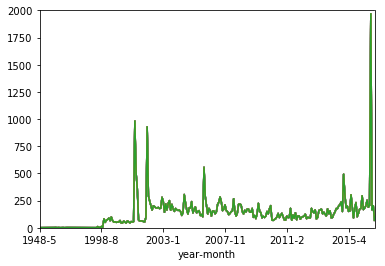

In [57]:
grouped.count().plot(legend=False, ylim=(0,2000))

In [56]:
# which section the article is in - grouping by sectionName
sections = terrorist_df.groupby('sectionName')
sections.count().sort_values('id', ascending=False)

,_id,apiUrl,fields,id,isHosted,query,sectionId,type,webPublicationDate,webTitle,webUrl,date,year-month
sectionName,,,,,,,,,,,,,
World news,10996,10996,10996,10996,10996,10996,10996,10996,10996,10996,10996,10996,10996
UK news,4824,4824,4824,4824,4824,4824,4824,4824,4824,4824,4824,4824,4824
Opinion,3639,3639,3639,3639,3639,3639,3639,3639,3639,3639,3639,3639,3639
Politics,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010
US news,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298,2298
Business,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610,1610
Media,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365
Books,901,901,901,901,901,901,901,901,901,901,901,901,901
Film,837,837,837,837,837,837,837,837,837,837,837,837,837
